## Lab 2 Due 9-7-18

Below is the code used to create a phylogenetic tree of the sequences listed on the seq.fa file.  The tree file was used by first using the MUSCLE command by Bob Edgar to create a Multiple Sequence Alignment(MSA).  Then the resulting aligned fasta file was applied to the FastTree tool to output a Newick-formatted tree.  These commands were applied in the terminal.  

In [1]:
%matplotlib inline

from Bio import Phylo
from io import StringIO

tree = Phylo.read("tree.nwk", "newick")

Phylo.draw_ascii(tree)

 , hu.39
 |
 | rh.50
 |
 , rh.57
 |
 | rh.51
 |
 | rh.49
 |
_, rh.53
 |
 | rh.64
 |
 , rh.61
 |
 |, rh.58
 ||
 ||                              , pi.2
 ||          ____________________|
 ||         |                    |, pi.3
 ||         |                    ||
 ||         |                     | pi.1
 ||         |
 ||         |           , rh.10
 ||        _|          ,|
 ||       | |          ||, bb.1
 ||       | |          |||
 ||       | |   _______| | bb.2
 ||       | |  |       |
 ||       | |  |       | _ hu.17
 ||       | |  |       ||
 ||       | |__|        | hu.6
 ||       |    |
 ||       |    |    ______ rh.2
 ||       |    |   |
 ||       |    |___|         __ rh.40
 ||       |        |        |
 ||       |        |________|, hu.67
 ||       |                 ||
 ||       |                 |, hu.37
 ||       |                  |
 ||       |                  |, hu.40
 ||       |                  ||
 ||       |                  || hu.66
 ||       |                  ||
 ||  

In the Newick tree above, I find 3 clusters.

**Cluster Sequences:**
Cluster 1: hu.39, rh.50, rh.57, rh.51, rh.49, rh.53, rh.64, rh.61, rh.58

Cluster 2: pi.2, pi.3, pi.1, rh.10, bb.1, bb.2, hu.17, hu.6, rh.2, rh.40, hu.67, hu.37, hu.40, hu.67, hu.37, hu.40, hu.66, hu.41, rh.38, hu.42

Cluster 3: cy.3, cy.6, cy.4, cy.5, rh.13, rh.35, rh.36, rh.37, cy.2, rh.54, rh.55, rh.48, rh.62, hu.43, hu.48, hu.44, hu.46, hu.14, hu.31, hu.32

I chose hu.39, hu.40, and cy.3 as representative sequences for my clusters.  These sequences will analyzed for matches using BLAST.  


In [42]:
from Bio import SeqIO

#List of representative cluster sequence IDs
clusterReps_seqs = ["hu.39", "cy.3", "hu.40"]

for seq_rec in SeqIO.parse("seqs.fa", "fasta"):
    #Prints the representative clusters to the screen
    if seq_rec.id in clusterReps_seqs: 
        print(seq_rec.id + "\n" + seq_rec.seq)
        

cy.3
atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggcattcgcgagtggtgggacttgaaacctggagccccgaaacccaaagccaaccagcaaaagcaggacgacggccggggtctggtgcttcctggctacaagtacctcagacccttcaacggactcgacaagggagagccggtcaacgaggcagacgccgcggccctcgagcacgacaaggcctacgacaagcagctcgagcagggggacaacccgtacctcaagtacaaccacgccgacgccgagtttcaggagcgtcttcaagaagatacgtcttttgggggcaacctcgggcgagcagtcttccaggccaagaagcgggttctcgaacctctcggtctggttgaggaagtcgctaagacggctcctggaaagaagagacccatagaatcccccgactcctccacgggcatcggcaagaaaggccagcagcccgctaaaaagaagctcaactttgggcagactggcgactcagagtcagtgcccgacccccaacctctcggagaacctcccgccgcgccctcaggtctgggatctggtacaatggctgcaggcggtggcgcaccaatggcagacaataacgaaggcgccgacggagtgggtaatgcctccggaaattggcattgcgattccacatggctgggcgacagagtcatcaccaccagcacccgcacctgggccctgcccacctacaacaaccacctctacaagcagatatcaagtcagagcggggctaccaacgacaaccacttcttcagctacagcaccccctggggctattttgacttcaacagattccactgccacttctcaccacgtgactggcagcgactcatcaacaacaactggggattccggcccagaaagctgcggttcaagttgttcaacatccaggtcaaggaggtcacgacgaacgacggcgttacgaccatcgctaataacct

**BLAST Results**

These are the top 4 matches found for each cluster using BLAST. 

*Most Common Matches:*
**hu.39:**
-Adeno-associated virus isolate hu.39 capsid protein VP1 (cap) gene, complete cds
-Adeno-associated virus isolate rh.64R1 capsid protein VP1 gene, partial cds
-Adeno-associated virus isolate rh.46 capsid protein VP1 gene, partial cds
-Adeno-associated virus isolate rh.64 capsid protein VP1 (cap) gene, complete cds

**hu.40:**
-Adeno-associated virus isolate hu.40 capsid protein VP1 (cap) gene, complete cds
-Adeno-associated virus isolate hu.37 capsid protein VP1 (cap) gene, complete cds
-Adeno-associated virus isolate hu.42 capsid protein VP1 (cap) gene, complete cds 
-Adeno-associated virus isolate hu.67 capsid protein VP1 (cap) gene, complete cds

**cy.3:**
-Non-human primate Adeno-associated virus isolate AAVcy.3 capsid protein (VP1) gene, complete cds
-Non-human primate Adeno-associated virus isolate AAVrh.13 capsid protein (VP1) gene, complete cds
-Adeno-associated virus isolate cy.5R4 capsid protein VP1 gene, partial cds 
-Adeno-associated virus isolate cy.1R1 capsid protein VP1 gene, partial cds 


Overall, the complete list of BLAST matches for each cluster are very similar.  However, their matches differ in match score.  They do match to the same genes in differing degrees.

I did not find any matches that definitely do not match the others.  I would not necessarily trust the sequence annotations in our BLAST results because for two reasons.  One reason is that all of the database information is collected experimentally, and the second reason is because the match is determined through a combination of different factors.

######################################################################
Below, I will use SeqIO to write cluster fasta files that include only sequences in that cluster.  These new fasta files will be used to subsequently align each cluster.

In [43]:
from Bio import SeqIO

#Creates lists of the ids of the sequences in each cluster

#Cluster 1
cluster1_seqs = ["hu.39", "rh.50", "rh.57", "rh.51", "rh.49", "rh.53", "rh.64", "rh.61", "rh.58"]
my_recs = []

for seq_rec in SeqIO.parse("seqs.fa", "fasta"):
    #creates a new fasta file for the sequences specified
    if seq_rec.id in cluster1_seqs: 
        my_recs.append(seq_rec)
   
SeqIO.write(my_recs, open("cluster1.fa", "w"), "fasta")

#Cluster 2
cluster2_seqs = ["pi.2", "pi.1", "pi.3", "rh.10", "bb.1", "bb.2", "hu.17", "hu.6", 
                "rh.2", "rh.40", "hu.67", "hu.37", "hu.40", "hu.66", "hu.41", "rh.38", 
                 "hu.42"]
my_recs = []

for seq_rec in SeqIO.parse("seqs.fa", "fasta"):
    #creates a new fasta file for the sequences specified
    if seq_rec.id in cluster2_seqs: 
        my_recs.append(seq_rec)
   
SeqIO.write(my_recs, open("cluster2.fa", "w"), "fasta")

#Cluster 3
cluster3_seqs = ["cy.3", "cy.6", "cy.4", "cy.5", "rh.13", "rh.35", "rh.36", 
                "rh.37", "cy.2", "rh.54", "rh.55", "rh.48", "rh.62", "hu.43", 
                "hu.48", "hu.44", "hu.46", "hu.14", "hu.31", "hu.32", "rh.43"]
my_recs = []

for seq_rec in SeqIO.parse("seqs.fa", "fasta"):
    #creates a new fasta file for the sequences specified
    if seq_rec.id in cluster3_seqs: 
        my_recs.append(seq_rec)
   
SeqIO.write(my_recs, open("cluster3.fa", "w"), "fasta")

#Use the muscle function in the terminal to make an aligned fasta file  

21

I processed each cluster fasta file using the MUSCLE tool in the terminal to get aligned cluster fasta files.

Using AlignIO allowed me to create tables for each alignment that can be analyzed by column.  Each column in the table represents a sequence position, and each row represents a sequence in the cluster.  

In order to see if there are any cluster regions of DNA that are skewed toward AT or GC nucleotides, I can calculate the percentage of AT and GC nucleotides at each position across all sequences in a cluster.  Using the bar graph function the from matplotlib package, I can show each sequence position as a bar that is a combination of AT and GC percentages.  

*Each bar would have a height of 1 if there are no gaps in the alignment.

To do this, I can iterate horizontally across the table and count the number of AT and GC nucleotides in each column.  These counts can then be converted to percentages and shown on a stacked bar graph.


Text(0.5,1,'Cluster 1: Positional AT versus GC Content')

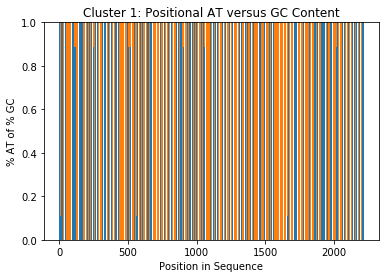

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from Bio import AlignIO
from Bio.Alphabet import IUPAC, Gapped
from Bio.Align import MultipleSeqAlignment

#############################################################################################
#Cluster 1
#Making an AlignIO table for each aligned sequence file
align1 = AlignIO.read(open("cluster1.aligned.fa"), "fasta")

#Practicing indexing the MSA object
#print(align)
#print(align[:,0])
#print(align.get_alignment_length())
#print(len(align))

#Lists for percentages of GC and AT content
listOfAT = []
listOfGC = []

for num in range(align1.get_alignment_length()):
    #Npos is all the nucleotides found at position num
    Npos = align1[:,num];
    #calculates number of AT and GC nucleotides over number of compared sequences
    ATsum = (Npos.count("A")+Npos.count("T"))/len(Npos)
    GCsum = (Npos.count("G")+Npos.count("C"))/len(Npos)
    #adds content percentages to a lists
    listOfAT.append(ATsum)
    listOfGC.append(GCsum)

MaxLength = align1.get_alignment_length()    
#line_out is the name of the graph.  bottom function sets the bottom
#of the second data set at the top of the first.
line_out = plt.bar(height = listOfAT, x = range(MaxLength))
line_out = plt.bar(height = listOfGC, bottom = listOfAT, x = range(MaxLength))
plt.xlabel("Position in Sequence")
plt.ylabel("% AT of % GC")
plt.title("Cluster 1: Positional AT versus GC Content")


Text(0.5,1,'Cluster 2: Positional AT versus GC Content')

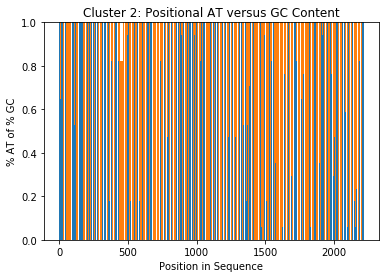

In [45]:
#############################################################################################
#Cluster 2
#Making an AlignIO table for each aligned sequence file
align2 = AlignIO.read(open("cluster2.aligned.fa"), "fasta")

#Lists for percentages of GC and AT content
listOfAT = []
listOfGC = []

for num in range(align2.get_alignment_length()):
    Npos = align2[:,num];
    #calculates number of AT and GC nucleotides over number of compared sequences
    ATsum = (Npos.count("A")+Npos.count("T"))/len(Npos)
    GCsum = (Npos.count("G")+Npos.count("C"))/len(Npos)
    #adds content percentages to a lists
    listOfAT.append(ATsum)
    listOfGC.append(GCsum)

MaxLength = align2.get_alignment_length()  
#line_out is the name of the graph.  bottom function sets the bottom
#of the second data set at the top of the first.
line_out2 = plt.bar(height = listOfAT, x = range(MaxLength))
line_out2 = plt.bar(height = listOfGC, bottom = listOfAT, x = range(MaxLength))

#Adding labels to graph
plt.xlabel("Position in Sequence")
plt.ylabel("% AT of % GC")
plt.title("Cluster 2: Positional AT versus GC Content")



Text(0.5,1,'Cluster 3: Positional AT versus GC Content')

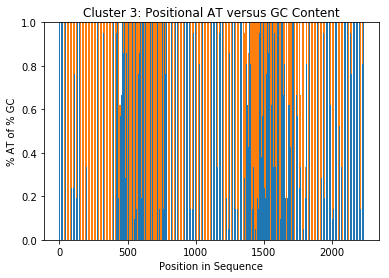

In [46]:
#############################################################################################
#Cluster 3
#Making an AlignIO table for each aligned sequence file
align3 = AlignIO.read(open("cluster3.aligned.fa"), "fasta")

#Lists for percentages of GC and AT content
listOfAT = []
listOfGC = []

for num in range(align3.get_alignment_length()):
    Npos = align3[:,num];
    #calculates number of AT and GC nucleotides over number of compared sequences
    ATsum = (Npos.count("A")+Npos.count("T"))/len(Npos)
    GCsum = (Npos.count("G")+Npos.count("C"))/len(Npos)
    #adds content percentages to a lists
    listOfAT.append(ATsum)
    listOfGC.append(GCsum)

MaxLength = align3.get_alignment_length()  
#line_out is the name of the graph.  bottom function sets the bottom
#of the second data set at the top of the first.
line_out3 = plt.bar(height = listOfAT, x = range(MaxLength))
line_out3 = plt.bar(height = listOfGC, bottom = listOfAT, x = range(MaxLength))

#Adding labels to graph
plt.xlabel("Position in Sequence")
plt.ylabel("% AT of % GC")
plt.title("Cluster 3: Positional AT versus GC Content")



I can show the distribution of sequence lengths in each cluster using box plots from the package matplotlib.

[2217, 2217, 2217, 2217, 2217, 2217, 2217, 2217, 2217]
[2217, 2217, 2217, 2217, 2217, 2217, 2217, 2217, 2217, 2217, 2196, 2196, 2196, 2217, 2217, 2217, 2217]
[2214, 2187, 2187, 2187, 2187, 2211, 2211, 2211, 2214, 2211, 2211, 2211, 2187, 2190, 2190, 2190, 2211, 2214, 2214, 2214, 2214]


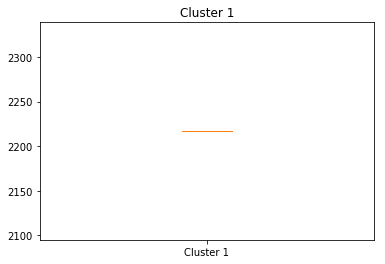

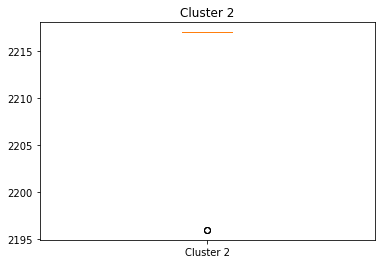

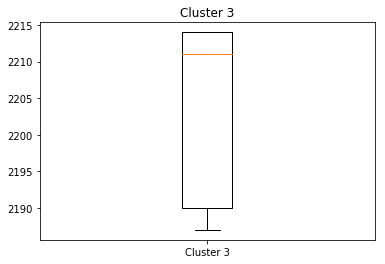

In [51]:
#BOXPLOT SHOWING DIFFERENCES IN LEGNTH
#Cluster 1
Seq_Lengths1 = []

for seq_rec in SeqIO.parse("cluster1.fa", "fasta"):
    Seq_Lengths1.append(len(seq_rec))

print(Seq_Lengths1)

#Cluster 2
Seq_Lengths2 = []

for seq_rec in SeqIO.parse("cluster2.fa", "fasta"):
    Seq_Lengths2.append(len(seq_rec))

print(Seq_Lengths2)


#Cluster 3
Seq_Lengths3 = []

for seq_rec in SeqIO.parse("cluster3.fa", "fasta"):
    Seq_Lengths3.append(len(seq_rec))

print(Seq_Lengths3)

plt.boxplot(Seq_Lengths1, labels = ["Cluster 1"])
plt.title("Cluster 1")
plt.show()

plt.boxplot(Seq_Lengths2, labels = ["Cluster 2"])
plt.title("Cluster 2")
plt.show()

plt.boxplot(Seq_Lengths3, labels = ["Cluster 3"])
plt.title("Cluster 3")
plt.show()

The shapes of the boxplots reflect the sequence lengths found in each cluster.  For cluster 1, all sequences are the same length, so the box plot is a line.  For cluster 2, all sequences are the same length except 3, so the box plot is a line plus an outlier group.  For cluster 3, there is a range of sequence lengths, so the components of the box plot are more visible.